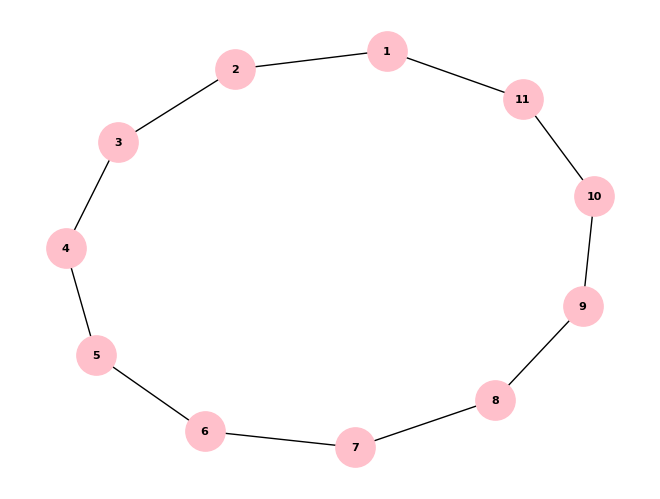

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(num_nodes):

    G = nx.Graph()

    G.add_nodes_from(range(1, num_nodes + 1))

    edges = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11),(11,1)]
    G.add_edges_from(edges)

    nx.draw(G, with_labels=True, font_weight='bold', node_color='pink', node_size=800, font_size=8)

    plt.show()

num_nodes = 11
draw_graph(num_nodes)

In [ ]:
def havel_hakimi_algorithm(sequence):
    while sequence:
        sequence.sort(reverse=True)
        degree = sequence.pop(0)

        if degree > len(sequence) or degree < 0:
            return False

        for i in range(degree):
            sequence[i] -= 1

        print("Degree sequence after iteration:", sequence)

    return True

degree_sequence = [5,3,3,3,3,3,2,2,2,2]
result = havel_hakimi_algorithm(degree_sequence)
if result:
  print("Graph is graphical")
else :
  print("Graph is not grpahical")

Degree sequence after iteration: [2, 2, 2, 2, 2, 2, 2, 2, 2]
Degree sequence after iteration: [1, 1, 2, 2, 2, 2, 2, 2]
Degree sequence after iteration: [1, 1, 2, 2, 2, 1, 1]
Degree sequence after iteration: [1, 1, 1, 1, 1, 1]
Degree sequence after iteration: [0, 1, 1, 1, 1]
Degree sequence after iteration: [0, 1, 1, 0]
Degree sequence after iteration: [0, 0, 0]
Degree sequence after iteration: [0, 0]
Degree sequence after iteration: [0]
Degree sequence after iteration: []
Graph is graphical


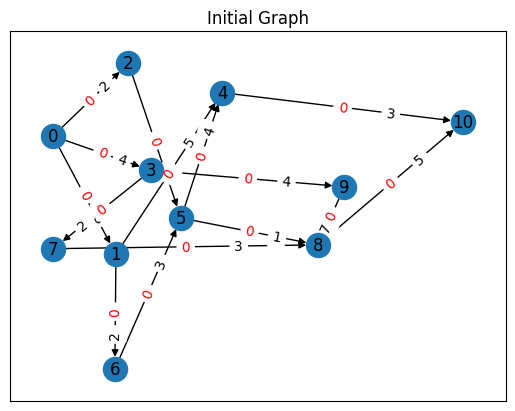


The maximum possible flow is 8 
Path: [(0, 1), (1, 4), (4, 10)]
Edge: (0, 1) - Final Flow: 3 - Residual Capacity: 3
Edge: (1, 4) - Final Flow: 3 - Residual Capacity: 5
Edge: (4, 10) - Final Flow: 3 - Residual Capacity: 3
Path: [(0, 2), (2, 5), (5, 8), (8, 10)]
Edge: (0, 2) - Final Flow: 1 - Residual Capacity: 2
Edge: (2, 5) - Final Flow: 1 - Residual Capacity: 4
Edge: (5, 8) - Final Flow: 1 - Residual Capacity: 1
Edge: (8, 10) - Final Flow: 5 - Residual Capacity: 5
Path: [(0, 3), (3, 7), (7, 8), (8, 10)]
Edge: (0, 3) - Final Flow: 4 - Residual Capacity: 4
Edge: (3, 7) - Final Flow: 2 - Residual Capacity: 2
Edge: (7, 8) - Final Flow: 2 - Residual Capacity: 3
Edge: (8, 10) - Final Flow: 5 - Residual Capacity: 5
Path: [(0, 3), (3, 9), (9, 8), (8, 10)]
Edge: (0, 3) - Final Flow: 4 - Residual Capacity: 4
Edge: (3, 9) - Final Flow: 2 - Residual Capacity: 4
Edge: (9, 8) - Final Flow: 2 - Residual Capacity: 7
Edge: (8, 10) - Final Flow: 5 - Residual Capacity: 5


In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import copy

class GraphVisualization:
    def __init__(self):
        self.graph = None

    def visualize_graph(self, graph, title, path_edges=None):
        self.graph = nx.DiGraph()
        for i in range(len(graph)):
            for j in range(len(graph[i])):
                if graph[i][j]['capacity'] > 0:
                    self.graph.add_edge(i, j, capacity=graph[i][j]['capacity'], flow=graph[i][j]['flow'])

        pos = nx.spring_layout(self.graph)
        labels_capacity = nx.get_edge_attributes(self.graph, 'capacity')
        labels_flow = nx.get_edge_attributes(self.graph, 'flow')
        nx.draw_networkx_nodes(self.graph, pos)
        nx.draw_networkx_labels(self.graph, pos)
        nx.draw_networkx_edges(self.graph, pos, edgelist=self.graph.edges(), edge_color='black', arrows=True)
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=labels_capacity, label_pos=0.3)
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=labels_flow, label_pos=0.5, font_color='red')

        if path_edges:
            highlighted_edges = [(path_edges[i], path_edges[i + 1]) for i in range(len(path_edges) - 1)]
            nx.draw_networkx_edges(self.graph, pos, edgelist=highlighted_edges, edge_color='green', arrows=True)

        plt.title(title)
        plt.show()

class Graph:
    def __init__(self, graph):
        self.graph = graph
        self.ROW = len(graph)
        self.residual_graph = [row.copy() for row in graph]

    def print_all_paths(self, source, sink):
        parent = [-1] * (self.ROW)
        all_paths = []

        while self.BFS(source, sink, parent):
            path_flow = float("Inf")
            s = sink
            path = []

            while s != source:
                path_flow = min(path_flow, self.residual_graph[parent[s]][s]['capacity'])
                path.append((parent[s], s))
                s = parent[s]

            path.reverse()
            all_paths.append(path)


            v = sink
            while v != source:
                u = parent[v]
                self.residual_graph[u][v]['capacity'] -= path_flow
                self.graph[u][v]['flow'] += path_flow
                self.residual_graph[v][u]['capacity'] += path_flow
                v = parent[v]

        return all_paths

    def BFS(self, s, t, parent):
        visited = [False] * (self.ROW)

        queue = []

        queue.append(s)
        visited[s] = True

        while queue:
            u = queue.pop(0)
            for ind, val in enumerate(self.residual_graph[u]):
                if visited[ind] == False and val['capacity'] > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u
                    if ind == t:
                        return True

        return False

    def MaxFlow(self, source, sink):
        parent = [-1] * (self.ROW)
        max_flow = 0

        while self.BFS(source, sink, parent):
            path_flow = float("Inf")
            s = sink

            while s != source:
                path_flow = min(path_flow, self.residual_graph[parent[s]][s]['capacity'])
                s = parent[s]

            v = sink
            while v != source:
                u = parent[v]
                self.residual_graph[u][v]['capacity'] -= path_flow
                self.graph[u][v]['flow'] += path_flow

                self.residual_graph[v][u]['capacity'] += path_flow

                v = parent[v]

            max_flow += path_flow

        return max_flow

graph = [
    [{'capacity': 0, 'flow': 0},
      {'capacity': 3, 'flow': 0},
      {'capacity': 2, 'flow': 0},
      {'capacity': 4, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0}],
    [{'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 5, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 2, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0}],
    [{'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 4, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0}],
    [{'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 2, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 4, 'flow': 0},
      {'capacity': 0, 'flow': 0}],
    [{'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 3, 'flow': 0}],
    [{'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 4, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 1, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0}],
    [{'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 3, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0}],
    [{'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 3, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0}],
    [{'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 5, 'flow': 0}],
    [{'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 7, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0}],
    [{'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0},
      {'capacity': 0, 'flow': 0}]
]


g = Graph(graph)
graph2 = copy.deepcopy(graph)
g2 = Graph(graph2)

source = 0; sink = 10

# 1) Generate initial graph
initial_title = "Initial Graph"
visualization = GraphVisualization()
visualization.visualize_graph(graph, initial_title)


# 2) Output of max flow (value)
max_flow = g.MaxFlow(source, sink)
print("\nThe maximum possible flow is %d " % max_flow)

# 1) Print all paths and update flow
all_paths = g2.print_all_paths(source, sink)
for path in all_paths:
    print("Path: {}".format(path))
    for edge in path:
        final_flow = g.graph[edge[0]][edge[1]]['flow']
        residual_capacity = g2.residual_graph[edge[0]][edge[1]]['capacity'] + final_flow

        print("Edge: {} - Final Flow: {} - Residual Capacity: {}".format(
            edge, final_flow, residual_capacity
        ))